###### Natural Language Processing & Machine Learning
<br><br>
<div style="background-color:rgba(128, 128, 0, 0.1); text-align:left; vertical-align: middle; padding:20px 0;">
<p style="font-size:134%;color:Deep Teal;">SC 4125: Developing Data Products</p>
    <p style="font-size:100%;color:Olive;">Module-6: Statistical tools for natural language processing and machine learning</p><br>

    
<br> 
by <a href="https://personal.ntu.edu.sg/anwitaman/" style="font-size:100%;color:Deep Teal;">Anwitaman DATTA</a><br>
School of Computer Science and Engineering, NTU Singapore.        
</div>

#### Teaching material
- <a href="M6-NLPML.slides.html">.html</a> deck of slides
- <a href="M6-NLPML.ipynb">.ipynb</a> Jupyter notebook

### Disclaimer/Caveat emptor

- Non-systematic and non-exhaustive review
- Illustrative approaches are not necessarily the most efficient or elegant, let alone unique

### Acknowledgement & Disclaimer

> This module is based on some original fragments of codes mixed with code snippets from many different sources (books, blogs, git repos, documentations, videos, ...). The narrative in the module is also influenced from the many sources consulted. They have been referenced in-place in a best effort manner. Links to several third-party videos and reading references have also been provided.

> If there are any attribution omissions to be rectified, or should anything in the material need to be changed or redacted, the copyright owners are requested to contact me at anwitaman@ntu.edu.sg  

# <span style="color:olivedrab">Elementary concepts</span>

In [1]:
from IPython.display import HTML

In [2]:
import nltk
#nltk.download("book") 
# We may use some of the existing corpora for some of our examples
# see more about nltk's corpora at https://www.nltk.org/book/ch02.html 
#from nltk.book import * ## Not used finally

#########

import spacy
nlp = spacy.load("en_core_web_sm")
#!python -m spacy download en_core_web_sm
# see more about spaCy models at https://spacy.io/models

### Making a first sense: What comprises the data?

> Encoding: e.g. <a href="https://en.wikipedia.org/wiki/UTF-8">UTF-8</a><br>
> - ♞ to F6 
> - Smöoy Frozen Yogurt

> Cleaning the data
> - e.g., using <span style="color:SteelBlue">RegEx</span>: We studied this in one of the early modules  

<b>Tokenization:</b> Granularity - Word, Sentence

<br>
 <center>
 <img alt="Neo4j book cover" src="pics/tokenization-spacy.svg" width="500">
 <br>Image source: <a href="https://spacy.io/usage/spacy-101">Spacy.io</a> 
 </center> 


In [3]:
NYT_Headline = "F.D.A. Panel Recommends Booster for Many Moderna Vaccine Recipients. Those eligible for the extra shot would include adults over 65 and others at high risk — the same groups now eligible for a Pfizer-BioNTech boost. By Sharon LaFraniere and Noah Weiland, Oct. 14, 2021"

EE1 ="An alarming problem looms once more: Iran is rapidly advancing its nuclear programme; Israel is threatening military action against it; and America is seeking a diplomatic solution. Anton La Guardia, The Economist’s diplomatic editor, wrote about the international crisis this poses. Al-Monitor, a publication that covers the Middle East, has been monitoring the negotiations to revive a nuclear deal from 2015. It makes for a fiendish dilemma that the former French president, Nicolas Sarkozy, encapsulated thus: `an Iranian bomb or the bombing of Iran'. Iran doesn't yet have a nuclear weapon. But the situation is in many ways worse than in the past. The country is closer than ever to being able to make a nuke. One expert, David Albright, puts the `breakout time'—the time needed to make one bomb’s worth of highly enriched uranium—at just one month. Mr Albright’s book is one of the most detailed accounts of the Iranian programme, drawing on years of inspections by the International Atomic Energy Agency and a trove of Iranian documents obtained by Israeli intelligence. Another problem is that the credibility of American diplomacy has been damaged by Donald Trump’s repudiation of the nuclear deal. His successor, Joe Biden, is trying to revive it but Iran doesn’t seem to be interested. Robert Malley, America's special envoy on Iran, discusses the impasse in a recent interview. Iran claims it seeks nuclear energy only for civilian purposes. The trouble is that the technology used to make low-enriched uranium fuel for nuclear power stations is also used to make highly-enriched uranium for weapons. Whatever its ultimate aim, Iran’s regime attaches great national pride to its mastery of nuclear technology: “our moon shot” is how one Iranian official put it, according to “The Back Channel”, a memoir by William Burns, the head of the CIA who, as a diplomat, helped negotiate the nuclear deal."

In [4]:
# Word tokenization
# Just split by space?
print(EE1.split())

['An', 'alarming', 'problem', 'looms', 'once', 'more:', 'Iran', 'is', 'rapidly', 'advancing', 'its', 'nuclear', 'programme;', 'Israel', 'is', 'threatening', 'military', 'action', 'against', 'it;', 'and', 'America', 'is', 'seeking', 'a', 'diplomatic', 'solution.', 'Anton', 'La', 'Guardia,', 'The', 'Economist’s', 'diplomatic', 'editor,', 'wrote', 'about', 'the', 'international', 'crisis', 'this', 'poses.', 'Al-Monitor,', 'a', 'publication', 'that', 'covers', 'the', 'Middle', 'East,', 'has', 'been', 'monitoring', 'the', 'negotiations', 'to', 'revive', 'a', 'nuclear', 'deal', 'from', '2015.', 'It', 'makes', 'for', 'a', 'fiendish', 'dilemma', 'that', 'the', 'former', 'French', 'president,', 'Nicolas', 'Sarkozy,', 'encapsulated', 'thus:', '`an', 'Iranian', 'bomb', 'or', 'the', 'bombing', 'of', "Iran'.", 'Iran', "doesn't", 'yet', 'have', 'a', 'nuclear', 'weapon.', 'But', 'the', 'situation', 'is', 'in', 'many', 'ways', 'worse', 'than', 'in', 'the', 'past.', 'The', 'country', 'is', 'closer', 't

In [5]:
# word tokenization using nltk
print(nltk.word_tokenize(EE1))

['An', 'alarming', 'problem', 'looms', 'once', 'more', ':', 'Iran', 'is', 'rapidly', 'advancing', 'its', 'nuclear', 'programme', ';', 'Israel', 'is', 'threatening', 'military', 'action', 'against', 'it', ';', 'and', 'America', 'is', 'seeking', 'a', 'diplomatic', 'solution', '.', 'Anton', 'La', 'Guardia', ',', 'The', 'Economist', '’', 's', 'diplomatic', 'editor', ',', 'wrote', 'about', 'the', 'international', 'crisis', 'this', 'poses', '.', 'Al-Monitor', ',', 'a', 'publication', 'that', 'covers', 'the', 'Middle', 'East', ',', 'has', 'been', 'monitoring', 'the', 'negotiations', 'to', 'revive', 'a', 'nuclear', 'deal', 'from', '2015', '.', 'It', 'makes', 'for', 'a', 'fiendish', 'dilemma', 'that', 'the', 'former', 'French', 'president', ',', 'Nicolas', 'Sarkozy', ',', 'encapsulated', 'thus', ':', '`', 'an', 'Iranian', 'bomb', 'or', 'the', 'bombing', 'of', 'Iran', "'", '.', 'Iran', 'does', "n't", 'yet', 'have', 'a', 'nuclear', 'weapon', '.', 'But', 'the', 'situation', 'is', 'in', 'many', 'wa

In [6]:
# word tokenization using spaCy
docEE = nlp(EE1) 
# This simple step creates a Doc object which has lot of information, some of which we will use subsequently 
print([token for token in docEE])

[An, alarming, problem, looms, once, more, :, Iran, is, rapidly, advancing, its, nuclear, programme, ;, Israel, is, threatening, military, action, against, it, ;, and, America, is, seeking, a, diplomatic, solution, ., Anton, La, Guardia, ,, The, Economist, ’s, diplomatic, editor, ,, wrote, about, the, international, crisis, this, poses, ., Al, -, Monitor, ,, a, publication, that, covers, the, Middle, East, ,, has, been, monitoring, the, negotiations, to, revive, a, nuclear, deal, from, 2015, ., It, makes, for, a, fiendish, dilemma, that, the, former, French, president, ,, Nicolas, Sarkozy, ,, encapsulated, thus, :, `, an, Iranian, bomb, or, the, bombing, of, Iran, ', ., Iran, does, n't, yet, have, a, nuclear, weapon, ., But, the, situation, is, in, many, ways, worse, than, in, the, past, ., The, country, is, closer, than, ever, to, being, able, to, make, a, nuke, ., One, expert, ,, David, Albright, ,, puts, the, `, breakout, time'—the, time, needed, to, make, one, bomb, ’s, worth, of, 

In [7]:
# Sentence tokenization using nltk
nltk.sent_tokenize(EE1)

['An alarming problem looms once more: Iran is rapidly advancing its nuclear programme; Israel is threatening military action against it; and America is seeking a diplomatic solution.',
 'Anton La Guardia, The Economist’s diplomatic editor, wrote about the international crisis this poses.',
 'Al-Monitor, a publication that covers the Middle East, has been monitoring the negotiations to revive a nuclear deal from 2015.',
 "It makes for a fiendish dilemma that the former French president, Nicolas Sarkozy, encapsulated thus: `an Iranian bomb or the bombing of Iran'.",
 "Iran doesn't yet have a nuclear weapon.",
 'But the situation is in many ways worse than in the past.',
 'The country is closer than ever to being able to make a nuke.',
 "One expert, David Albright, puts the `breakout time'—the time needed to make one bomb’s worth of highly enriched uranium—at just one month.",
 'Mr Albright’s book is one of the most detailed accounts of the Iranian programme, drawing on years of inspecti

In [8]:
# Sentence tokenization using spaCy
[x for x in docEE.sents]

[An alarming problem looms once more: Iran is rapidly advancing its nuclear programme; Israel is threatening military action against it; and America is seeking a diplomatic solution.,
 Anton La Guardia, The Economist’s diplomatic editor, wrote about the international crisis this poses.,
 Al-Monitor, a publication that covers the Middle East, has been monitoring the negotiations to revive a nuclear deal from 2015.,
 It makes for a fiendish dilemma that the former French president, Nicolas Sarkozy, encapsulated thus: `an Iranian bomb or the bombing of Iran'.,
 Iran doesn't yet have a nuclear weapon.,
 But the situation is in many ways worse than in the past.,
 The country is closer than ever to being able to make a nuke.,
 One expert, David Albright, puts the `breakout time'—the time needed to make one bomb’s worth of highly enriched uranium—at just one month.,
 Mr Albright’s book is one of the most detailed accounts of the Iranian programme, drawing on years of inspections by the Intern

In [9]:
# Sentence tokenization: Further example
# With the NYT headline example, the nltk model thinks F.D.A. is a sentence of its own!
# This example is NOT to be used to conclude one toolkit's superiority over other. 
# More rigorous/exhaustive experiments are needed for that, and each excels for some or other tasks.
# The only point I want to make with this example is the potential limitations in general of these black-box tools!

print(nltk.sent_tokenize(NYT_Headline)) # nltk 
print()
docNYT = nlp(NYT_Headline) # spaCy 
print([x for x in docNYT.sents])

['F.D.A.', 'Panel Recommends Booster for Many Moderna Vaccine Recipients.', 'Those eligible for the extra shot would include adults over 65 and others at high risk — the same groups now eligible for a Pfizer-BioNTech boost.', 'By Sharon LaFraniere and Noah Weiland, Oct. 14, 2021']

[F.D.A. Panel Recommends Booster for Many Moderna Vaccine Recipients., Those eligible for the extra shot would include adults over 65 and others at high risk — the same groups now eligible for a Pfizer-BioNTech boost., By Sharon LaFraniere and Noah Weiland, Oct. 14, 2021]


> <b>Normalization:</b> Map text to a canonical representation. 
> - Examples:
>    * b4, Before, befor, before
>    * US, U.S.A., USA, United States, United States of America, ...    
>    * 5th of November, 5 Nov., November 5, ...
>    * synonyms: Pfizer–BioNTech COVID-19 vaccine, Comirnaty, BNT162b2, ... 


> <b>Normalization:</b> Map text to a canonical representation. 
> - Some standard tools: 
>    * <b>Stemming:</b> usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. 
>    * <b>Lemmatization:</b> usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.
>        * Definitions from <a href="https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html">Introduction to Information Retrieval
 by Manning et al.</a> 

In [10]:
# Stemming and Lemmatization example with a list of words
input_list = "resting restful restless being is was am goodness goods"
words_list = input_list.lower().split(' ')

In [11]:
# nltk includes multiple stemming algorithms, e.g., Porter, Snowball, ...
## see more at https://www.nltk.org/api/nltk.stem.html
porter = nltk.PorterStemmer()
print("NLTK PorterStemmer", [porter.stem(t) for t in words_list])
##
snowball = nltk.SnowballStemmer("english")
print("NLTK SnowStemmer", [snowball.stem(t) for t in words_list])

NLTK PorterStemmer ['rest', 'rest', 'restless', 'be', 'is', 'wa', 'am', 'good', 'good']
NLTK SnowStemmer ['rest', 'rest', 'restless', 'be', 'is', 'was', 'am', 'good', 'good']


In [12]:
# Wordnet based lemmatizer in nltk
WNlemma = nltk.WordNetLemmatizer()
print("NLTK Wordnet Lemmatizer", [WNlemma.lemmatize(x) for x in words_list])

NLTK Wordnet Lemmatizer ['resting', 'restful', 'restless', 'being', 'is', 'wa', 'am', 'goodness', 'good']


In [13]:
# spaCy also returns hash of a lemma if you want e.g., convenient for aggregating, Map-Reduce, etc)
list_variations=nlp(input_list)
print([(x.lemma, x.lemma_) for x in list_variations])

[(10960894369163974213, 'rest'), (12859622076218287646, 'restful'), (15810880026682126118, 'restless'), (3899131925553995529, 'being'), (10382539506755952630, 'be'), (10382539506755952630, 'be'), (10382539506755952630, 'be'), (13871556783787251893, 'goodness'), (5711639017775284443, 'good')]


<b>Ungraded task 6.1:</b> Write a function which takes as input text, and returns a list of lemmatized tokens with stopwords and punctuations filtered out. 

Example output: ['alarming', 'problem', 'loom', 'Iran', ...]

### Making sense of sentence structure: Part-of-speech (POS) tagging

> Note: Need to be careful about which kinds of normalizations are carried out in earlier stages, since some of those have destructive effects on the semantics essential for making sense of the sentence, e.g., US versus us.


> May need to detect/determine the language before this step (since the grammar rules are language dependent).

In [14]:
print(NYT_Headline +"\n")
NYT_postags=nltk.pos_tag(nltk.word_tokenize(NYT_Headline))
print(NYT_postags)

F.D.A. Panel Recommends Booster for Many Moderna Vaccine Recipients. Those eligible for the extra shot would include adults over 65 and others at high risk — the same groups now eligible for a Pfizer-BioNTech boost. By Sharon LaFraniere and Noah Weiland, Oct. 14, 2021

[('F.D.A', 'NNP'), ('.', '.'), ('Panel', 'NNP'), ('Recommends', 'VBZ'), ('Booster', 'NNP'), ('for', 'IN'), ('Many', 'NNP'), ('Moderna', 'NNP'), ('Vaccine', 'NNP'), ('Recipients', 'NNP'), ('.', '.'), ('Those', 'DT'), ('eligible', 'JJ'), ('for', 'IN'), ('the', 'DT'), ('extra', 'JJ'), ('shot', 'NN'), ('would', 'MD'), ('include', 'VB'), ('adults', 'NNS'), ('over', 'IN'), ('65', 'CD'), ('and', 'CC'), ('others', 'NNS'), ('at', 'IN'), ('high', 'JJ'), ('risk', 'NN'), ('—', 'VBP'), ('the', 'DT'), ('same', 'JJ'), ('groups', 'NNS'), ('now', 'RB'), ('eligible', 'VBP'), ('for', 'IN'), ('a', 'DT'), ('Pfizer-BioNTech', 'JJ'), ('boost', 'NN'), ('.', '.'), ('By', 'IN'), ('Sharon', 'NNP'), ('LaFraniere', 'NNP'), ('and', 'CC'), ('Noah', 'N

In [15]:
nltk.help.upenn_tagset(NYT_postags[0][1])
# For full list, use nltk.help.upenn_tagset()

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [16]:
# with spaCy
[(token.text, token.lemma_, token.pos_, token.tag_) for token in docNYT]

[('F.D.A.', 'F.D.A.', 'PROPN', 'NNP'),
 ('Panel', 'Panel', 'PROPN', 'NNP'),
 ('Recommends', 'recommend', 'VERB', 'VBZ'),
 ('Booster', 'Booster', 'PROPN', 'NNP'),
 ('for', 'for', 'ADP', 'IN'),
 ('Many', 'many', 'ADJ', 'JJ'),
 ('Moderna', 'Moderna', 'PROPN', 'NNP'),
 ('Vaccine', 'Vaccine', 'PROPN', 'NNP'),
 ('Recipients', 'Recipients', 'PROPN', 'NNP'),
 ('.', '.', 'PUNCT', '.'),
 ('Those', 'those', 'DET', 'DT'),
 ('eligible', 'eligible', 'ADJ', 'JJ'),
 ('for', 'for', 'ADP', 'IN'),
 ('the', 'the', 'DET', 'DT'),
 ('extra', 'extra', 'ADJ', 'JJ'),
 ('shot', 'shot', 'NOUN', 'NN'),
 ('would', 'would', 'AUX', 'MD'),
 ('include', 'include', 'VERB', 'VB'),
 ('adults', 'adult', 'NOUN', 'NNS'),
 ('over', 'over', 'ADP', 'IN'),
 ('65', '65', 'NUM', 'CD'),
 ('and', 'and', 'CCONJ', 'CC'),
 ('others', 'other', 'NOUN', 'NNS'),
 ('at', 'at', 'ADP', 'IN'),
 ('high', 'high', 'ADJ', 'JJ'),
 ('risk', 'risk', 'NOUN', 'NN'),
 ('—', '—', 'PUNCT', ':'),
 ('the', 'the', 'DET', 'DT'),
 ('same', 'same', 'ADJ', 'JJ')

### Caution: Ambiguities

In [17]:
# POS taggers typically round up the usual suspects (i.e., looks at the most common usage of words)

guardian_headline="British Left Waffles on Falkland Islands"
# What does it mean?
# To waffle: to speak or write at length in a vague or trivial manner, fail to make up one's mind.
# The British party of the left rambles indecisively about Falkland Island policy.
# The British forces left behind waffles (the pastry) on the Falkland Islands.

print('nltk: No verb!')
print(nltk.pos_tag(nltk.word_tokenize(guardian_headline)))
print()
print('spaCy: The second meaning!')
docG=nlp(guardian_headline)
print([(token.text, token.tag_) for token in docG])


nltk: No verb!
[('British', 'JJ'), ('Left', 'NNP'), ('Waffles', 'NNP'), ('on', 'IN'), ('Falkland', 'NNP'), ('Islands', 'NNP')]

spaCy: The second meaning!
[('British', 'NNP'), ('Left', 'VBD'), ('Waffles', 'NNP'), ('on', 'IN'), ('Falkland', 'NNP'), ('Islands', 'NNPS')]


# <span style="color:olivedrab">Classification & topic modeling<span>

### Classification and topic modeling 

> Features 
> - words, word sequences, numbers, dates, which normalizations to do/not do, capitalization, POS, grammatical structure 
>
> See <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/">an example of features used for spam detection</a> 


#### Classification/Sentiment Analysis

> We will use an IMDB reviews dataset from Kaggle for exploring a simple (only two classes, using balanced data) example of classification
> https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [18]:
import pandas as pd
import numpy as np
imdb_df = pd.read_csv('data/IMDBPolarDataset.csv')
# Data from https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
print(imdb_df['sentiment'].value_counts())
#print()
#print(imdb_df.sample(3))
#print()
imdb_df['sentiment'] = np.where(imdb_df['sentiment'] == 'positive', 1, 0)
print(imdb_df.sample(5))
imdb_df=imdb_df.sample(frac=0.2, random_state=0)  
# For scalability, it may make sense to use a smaller sample of data for the whole ML pipeline
# You may have to experiment with the sample size to find a good balance

positive    25000
negative    25000
Name: sentiment, dtype: int64
                                                  review  sentiment
8134   That's the worst film I saw since a long time....          0
5960   I remember this bomb coming out in the early 8...          0
19706  Okay, I'll admit it--I am a goof-ball and I oc...          1
12826  This film lingered and lingered at a small mov...          1
39656  Two things haunt you throughout L'intrus (The ...          1


### Train and test  
- Cross-validation
    * Discussed in greater detail later in the module

In [19]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(imdb_df['review'], 
                                                    imdb_df['sentiment'], 
                                                    random_state=0,test_size=0.2)

#### detour: CountVectorizer
> Need to represent the information (features) in a manner that the ML algorithm can "consume"

In [20]:
# detour 
## Example code from https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is not the fourth one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())
print(X.toarray().shape)

['and' 'document' 'first' 'fourth' 'is' 'not' 'one' 'second' 'the' 'this']
[[0 1 1 0 1 0 0 0 1 1]
 [0 2 0 0 1 0 0 1 1 1]
 [1 0 0 1 1 1 1 0 1 1]
 [0 1 1 0 1 0 0 0 1 1]]
(4, 10)


In [21]:
# if you want to exclude stop words
## be careful for what you ask for: e.g., we lost 'not'
vectorizerWSW = CountVectorizer(stop_words='english')
X_WSW = vectorizerWSW.fit_transform(corpus)
print(vectorizerWSW.get_feature_names_out())
print(X_WSW.toarray())
print(X_WSW.toarray().shape)

['document' 'fourth' 'second']
[[1 0 0]
 [2 0 1]
 [0 1 0]
 [1 0 0]]
(4, 3)


In [22]:
# if you want to customize your stopwords, you may want to start with the default, and see what you want to add/remove
from sklearn.feature_extraction import text 
#print(sorted(list(text.ENGLISH_STOP_WORDS)))
set_to_remove={"no","nor","not","none","nooooo!"}
new_set=text.ENGLISH_STOP_WORDS - set_to_remove

In [23]:
## you can provide your own customized list
vectorizerWSW = CountVectorizer(stop_words=new_set)
X_WSW = vectorizerWSW.fit_transform(corpus)
print(vectorizerWSW.get_feature_names_out())
print(X_WSW.toarray())
print(X_WSW.toarray().shape)

['document' 'fourth' 'not' 'second']
[[1 0 0 0]
 [2 0 0 1]
 [0 1 1 0]
 [1 0 0 0]]
(4, 4)


In [24]:
# if you want n-grams
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(1, 2), stop_words=new_set)
# you can use 'char' and ‘char_wb’ options for analyzer for character (and respectively, characters restricted to word boundaries) based n-grams
X2 = vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names_out())
print(X2.toarray())

['document' 'document second' 'fourth' 'not' 'not fourth' 'second'
 'second document']
[[1 0 0 0 0 0 0]
 [2 1 0 0 0 1 1]
 [0 0 1 1 1 0 0]
 [1 0 0 0 0 0 0]]


### Back to the IMDB data

In [25]:
import time
start = time.time()
cv = CountVectorizer().fit(X_train)
# Other vectorizers are possible, e.g., TF-IDf 
print(f"Number of tokens: {len(cv.get_feature_names_out())}")
end = time.time()
print(f"Runtime for vectorization fitting for Model 1: {end - start} seconds")
# Using words and word bi-grams 
start = time.time()
cv2 = CountVectorizer(analyzer='word', ngram_range=(1, 2)).fit(X_train)
print(f"Number of tokens: {len(cv2.get_feature_names_out())}")
end = time.time()
print(f"Runtime for vectorization fitting for Model 2: {end - start} seconds")
# Remove tokens that don't appear in at least 5 reviews, or if it appears in more than 50% of the reviews. 
# Use upto word tri-grams.
start = time.time()
cv3 = CountVectorizer(min_df=5, max_df=0.5, ngram_range=(1, 3), stop_words=new_set).fit(X_train)
print(f"Number of tokens: {len(cv3.get_feature_names_out())}")
end = time.time()
print(f"Runtime for vectorization fitting for Model 1: {end - start} seconds")

Number of tokens: 47536
Runtime for vectorization fitting for Model 1: 1.4932281970977783 seconds
Number of tokens: 660629
Runtime for vectorization fitting for Model 2: 7.169947862625122 seconds
Number of tokens: 30295
Runtime for vectorization fitting for Model 1: 7.134037256240845 seconds


In [26]:
start = time.time()
X_train_vec = cv.transform(X_train)
end = time.time()
print(f"Runtime for transforming training data for Model 1: {end - start} seconds")
#
start = time.time()
X_train_vec2 = cv2.transform(X_train)
end = time.time()
print(f"Runtime for transforming training data for Model 2: {end - start} seconds")
#
start = time.time()
X_train_vec3 = cv3.transform(X_train)
end = time.time()
print(f"Runtime for transforming training data for Model 3: {end - start} seconds")

Runtime for transforming training data for Model 1: 2.2858214378356934 seconds
Runtime for transforming training data for Model 2: 5.156646728515625 seconds
Runtime for transforming training data for Model 3: 3.6959545612335205 seconds


#### Detour: Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression 
print("Third party content:")
# The StatQuest channel has many nice, easy to understand at an intuitive level videos. 
# Check them up for a quick introduction/brush-up of the underlying ideas (without the mathematical details)
HTML('<iframe width="550" height="300" src="https://www.youtube.com/embed/yIYKR4sgzI8" title="Support Vector Machines" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Third party content:


In [28]:
# Train the models 
start = time.time()
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train_vec, y_train)
end = time.time()
print(f"Runtime for training Model 1: {end - start} seconds")
###
start = time.time()
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train_vec2, y_train)
end = time.time()
print(f"Runtime for training Model 2: {end - start} seconds")
###
start = time.time()
model3 = LogisticRegression(max_iter=1000)
model3.fit(X_train_vec3, y_train)
end = time.time()
print(f"Runtime for training Model 3: {end - start} seconds")

Runtime for training Model 1: 9.124244213104248 seconds
Runtime for training Model 2: 56.488693714141846 seconds
Runtime for training Model 3: 1.4204068183898926 seconds


#### Detour: Accuracy, Confusion Matrix and ROC/AUC

In [91]:
print("Third party content on : AUC (Area Under The Curve) / ROC (Receiver Operating Characteristics)")
HTML('<iframe width="550" height="300" src="https://www.youtube.com/embed/4jRBRDbJemM" title="ROC/AUC" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Third party content on : AUC (Area Under The Curve) / ROC (Receiver Operating Characteristics)


In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
import matplotlib as mpl 
#import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
#import itertools

AUC (model with words):  0.8600351134074928
Accuracy (model with words):  0.859
Runtime for predicting with Model 1: 0.661902904510498 seconds


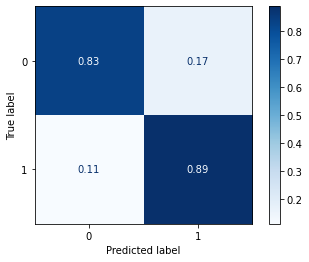

In [31]:
# Predict the transformed test documents
start = time.time()
predictions1 = model1.predict(cv.transform(X_test))
print('AUC (model with words): ', roc_auc_score(y_test, predictions1))
print("Accuracy (model with words): ", accuracy_score(y_test, predictions1))
end = time.time()
print(f"Runtime for predicting with Model 1: {end - start} seconds")
ConfusionMatrixDisplay.from_predictions(y_test,predictions1,normalize="true",cmap=plt.cm.Blues)
# Absolute numbers can be used by removing attribute normalize="true"

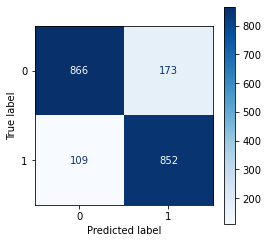

In [32]:
# Alternative: Plotting using a precomputed confusion matrix
cm = confusion_matrix(y_test, predictions1, labels=model1.classes_) 
# confusion_matrix can also use attribute normalize="true"
fig, ax = plt.subplots(figsize=(4,4))
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model1.classes_).plot(cmap=plt.cm.Blues,ax=ax) 

AUC (with word bigrams):  0.8801952770163418
Accuracy (with word bigrams):  0.8795
Runtime for predicting with Model 2: 2.022491455078125 seconds


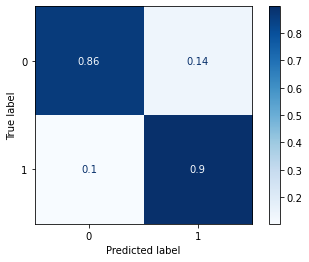

In [33]:
# Using model 2 (words and word bi-grams)
start = time.time()
predictions2 = model2.predict(cv2.transform(X_test))
print('AUC (with word bigrams): ', roc_auc_score(y_test, predictions2))
print("Accuracy (with word bigrams): ", accuracy_score(y_test, predictions2))
end = time.time()
print(f"Runtime for predicting with Model 2: {end - start} seconds")
ConfusionMatrixDisplay.from_predictions(y_test,predictions2,normalize="true",cmap=plt.cm.Blues)

AUC (with filtering and upto trigrams):  0.8735486675233028
Accuracy (with filtering and upto trigrams):  0.873
Runtime for predicting with Model 3: 1.1680829524993896 seconds


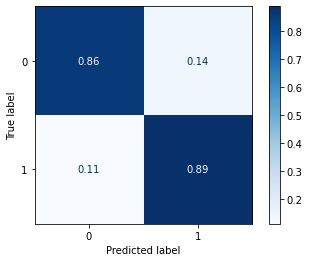

In [34]:
### Using words bi/tri-grams and frequency based filtering 
start = time.time()
predictions3 = model3.predict(cv3.transform(X_test))
print('AUC (with filtering and upto trigrams): ', roc_auc_score(y_test, predictions3))
print("Accuracy (with filtering and upto trigrams): ", accuracy_score(y_test, predictions3))
end = time.time()
print(f"Runtime for predicting with Model 3: {end - start} seconds")
ConfusionMatrixDisplay.from_predictions(y_test,predictions3,normalize="true",cmap=plt.cm.Blues)

#### Some other popular/baseline models for text classification

In [92]:
# from nltk.classify import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB
print("Third party content:")
HTML('<iframe width="550" height="300" src="https://www.youtube.com/embed/O2L2Uv9pdDA" title="Naive Mayes" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Third party content:


In [36]:
from sklearn.svm import SVC
# The following YouTube video on Suppor Verctor Machines provides a very nice high level overview
# Even if you are familiar with SVM/SVC, you may gain some nice perspectives 
# The presenter has a sense of humor (Bam!) which is a bit weird, but as long as you like/ignore it, the technical coverage for the intuitions is nice.
print("Third party content:")
HTML('<iframe width="550" height="300" src="https://www.youtube.com/embed/efR1C6CvhmE" title="Support Vector Machines" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Third party content:


In [37]:
start = time.time()
modelNB = MultinomialNB().fit(X_train_vec,y_train)
end = time.time()
print(f"Runtime for fitting NB: {end - start} seconds")
#
start = time.time()
predictionsNB = modelNB.predict(cv.transform(X_test))
print('AUC (Naive): ', roc_auc_score(y_test, predictionsNB))
end = time.time()
print(f"Runtime for predicting with NB: {end - start} seconds")


Runtime for fitting NB: 0.014167547225952148 seconds
AUC (Naive):  0.8308722567024445
Runtime for predicting with NB: 0.8845677375793457 seconds


In [38]:
start = time.time()
modelNB = MultinomialNB().fit(X_train_vec3,y_train)
end = time.time()
print(f"Runtime for fitting NB: {end - start} seconds")
start = time.time()
predictionsNB = modelNB.predict(cv3.transform(X_test))
print('AUC (Naive): ', roc_auc_score(y_test, predictionsNB))
end = time.time()
print(f"Runtime for predicting with NB: {end - start} seconds")

Runtime for fitting NB: 0.025911569595336914 seconds
AUC (Naive):  0.8501495775073887
Runtime for predicting with NB: 1.344125509262085 seconds


In [39]:
start = time.time()
modelSVC = SVC(kernel="linear").fit(X_train_vec,y_train)
end = time.time()
print(f"Runtime for fitting SVC: {end - start} seconds")
#
start = time.time()
predictionsSVC = modelSVC.predict(cv.transform(X_test))
print('AUC (SVC): ', roc_auc_score(y_test, predictionsSVC))
end = time.time()
print(f"Runtime for predicting with SVC: {end - start} seconds")

Runtime for fitting SVC: 48.139628410339355 seconds
AUC (SVC):  0.8429310982003627
Runtime for predicting with SVC: 9.894097089767456 seconds


In [40]:
start = time.time()
modelSVC = SVC(kernel="linear").fit(X_train_vec3,y_train)
end = time.time()
print(f"Runtime for fitting SVC: {end - start} seconds")
start = time.time()
predictionsSVC = modelSVC.predict(cv3.transform(X_test))
print('AUC (SVC): ', roc_auc_score(y_test, predictionsSVC))
end = time.time()
print(f"Runtime for predicting with SVC: {end - start} seconds")

Runtime for fitting SVC: 39.08421754837036 seconds
AUC (SVC):  0.8604116861746717
Runtime for predicting with SVC: 8.268787860870361 seconds


In [41]:
#from sklearn.datasets import fetch_20newsgroups
#newsgroups_train = fetch_20newsgroups(subset='train')
#print(newsgroups_train.target_names)
# print(newsgroups_train.data[10])

### A few words on ... 

> Word embedding: Dimensionality reduction


> Using pretrained models

In [42]:
# The following code on using embedding for vectorization is adapted from:
# https://github.com/practical-nlp

import os
import wget
import gzip
import shutil

gn_vec_path = "GoogleNews-vectors-negative300.bin"
gn_vec_zip_path = "GoogleNews-vectors-negative300.bin.gz"
if not os.path.exists(gn_vec_path):
    if not os.path.exists(gn_vec_zip_path): 
        wget.download("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz")
    with gzip.open(gn_vec_zip_path, 'rb') as f_in:
            with open(gn_vec_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

In [43]:
from gensim.models import Word2Vec, KeyedVectors
pretrainedpath = gn_vec_path
w2v_model = KeyedVectors.load_word2vec_format(pretrainedpath, binary=True) #load the model
print("Numver of words in vocablulary: ",len(list(w2v_model.index_to_key)))#Number of words in the vocabulary.

Numver of words in vocablulary:  3000000


In [44]:
print(len(w2v_model['Singapore']))
w2v_model['Singapore'][:10]

300


array([ 0.06005859, -0.07763672, -0.01135254,  0.08544922, -0.08154297,
       -0.13671875, -0.21875   , -0.05859375, -0.06176758,  0.14257812],
      dtype=float32)

In [45]:
print(w2v_model.most_similar('Singapore'))
print()
print(w2v_model.most_similar('singapore'))

[('Hong_Kong', 0.7355004549026489), ('Malaysia', 0.7280135154724121), ('Kuala_Lumpur', 0.6947176456451416), ('Singaporean', 0.680225670337677), ('SIngapore', 0.665448784828186), ("S'pore", 0.6562163233757019), ('Malaysian', 0.6307142972946167), ('Inkster_Miyazato', 0.6058071851730347), ('Exchange_Ltd._S##.SG', 0.6021658778190613), ('GP_Pte_Ltd', 0.6005238890647888)]

[('malaysia', 0.647721529006958), ('hong_kong', 0.6318016052246094), ('malaysian', 0.6025472283363342), ('australia', 0.597445011138916), ('uae', 0.5960760116577148), ('india', 0.5947676301002502), ('uk', 0.5883470773696899), ('chinese', 0.5872371792793274), ('usa', 0.583607017993927), ('simon', 0.5695350766181946)]


In [46]:
print(w2v_model['Singapore'][0])
print(w2v_model['singapore'][0])

0.060058594
0.06933594


In [47]:
print(w2v_model.distance('Singapore','Japan'))
print(w2v_model.similarity('Singapore','Japan'))

0.546599805355072
0.4534002


In [48]:
# may need to refactor the below code with other codes in this notebook
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

def preprocess_corpus(texts):
    mystopwords = set(stopwords.words("english"))
    def remove_stops_digits(tokens):
        #Nested function that lowercases, removes stopwords and digits from a list of tokens
        return [token.lower() for token in tokens if token.lower() not in mystopwords and not token.isdigit()
               and token not in punctuation]
    #This return statement below uses the above function to process twitter tokenizer output further. 
    return [remove_stops_digits(word_tokenize(text)) for text in texts]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\datta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
def embedding_feats(list_of_lists):
    DIMENSION = 300 ## This is essentially coming from the embedding space 
    zero_vector = np.zeros(DIMENSION)
    feats = []
    for tokens in list_of_lists:
        feat_for_this =  np.zeros(DIMENSION)
        count_for_this = 0 + 1e-5 # to avoid divide-by-zero 
        for token in tokens:
            if token in w2v_model:
                feat_for_this += w2v_model[token]
                count_for_this +=1
        if(count_for_this!=0):
            feats.append(feat_for_this/count_for_this) 
        else:
            feats.append(zero_vector)
    return feats

In [50]:
Xtrain_prepro = preprocess_corpus(X_train)
Xtest_prepro = preprocess_corpus(X_test)
train_vect = embedding_feats(Xtrain_prepro)
test_vect = embedding_feats(Xtest_prepro)

AUC (with pretrained embedding):  0.8476652989196567
Accuracy (with pretrained embedding):  0.847


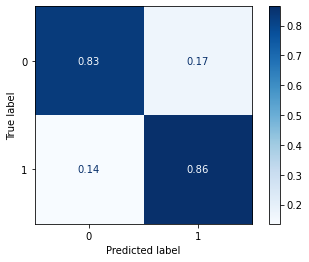

In [51]:
model1.fit(train_vect, y_train) # Recall: It was the basic logistic regression model
predictions = model1.predict(test_vect)
print('AUC (with pretrained embedding): ', roc_auc_score(y_test, predictions))
print("Accuracy (with pretrained embedding): ", accuracy_score(y_test, predictions))
ConfusionMatrixDisplay.from_predictions(y_test,predictions,normalize="true",cmap=plt.cm.Blues)

### Topic modeling and document similarity

In [52]:
# A few more toy documents
EE2 ="Colin Powell, America’s former secretary of state and chairman of the joint chiefs of staff, died from complications related to covid-19, aged 84. He was the first black man to hold either position. George H.W. Bush appointed him as the youngest person ever to serve as America’s highest-ranking military officer in 1989. Under George W. Bush he was the county’s top diplomat from 2001 to 2005."
EE3 = "The world’s biggest streaming service disappointed Wall Street last quarter when it revealed tepid growth in subscribers. Its earnings report today should tell a different tale. The main driver of subscriptions is new content. Though scarce earlier this year because of the disruption caused by covid-19, the pipeline is filling up again. Old favourites like “Money Heist” and “Sex Education” are back with new episodes, and “Squid Game”, a dystopic South Korean thriller, has proved to be Netflix’s biggest-ever hit."
doc1 = nlp(EE1) 
doc2 = nlp(EE2)
doc3 = nlp(EE3)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [EE1,EE2,EE3]
vect = TfidfVectorizer(min_df=1, stop_words="english")                                                                                                                                                                                                   
tfidf = vect.fit_transform(corpus)                                                                                                                                                                                                                       
pairwise_similarity = tfidf * tfidf.T 

import itertools
for i,j in itertools.product(range(3), range(3)):
    if i<j:
        print("Similarity between documents",i+1,j+1,":",pairwise_similarity[i,j])

Similarity between documents 1 2 : 0.029378258437261235
Similarity between documents 1 3 : 0.0
Similarity between documents 2 3 : 0.024661696851234052


In [54]:
# Similarities using spacy/need to load word vector for more meaningful similarities
#print(doc1.similarity(doc2))
#print(doc1.similarity(doc3))
#print(doc2.similarity(doc3))

### LDA: Latent Dirichlet Allocation

<b>Key ideas/intuitions:<b> 
1. Each document is a mix of topics (following some "unknown" distribution)
   * Topics are not explicitly defined, but we have an "estimate" of the number of topics
2. Each topic is a mix of words (again, following some "unknown" distribution) 

In [93]:
# The following YouTube video on Latent Dirichlet allocation provides a very nice high level overview
# Even if you are familiar with LDA and topic modeling, you may gain some nice perspectives 
print("Third party content:")
HTML('<iframe width="550" height="300" src="https://www.youtube.com/embed/3mHy4OSyRf0" title="Support Vector Machines" frameborder="0" allow="accelerometer; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Third party content:


![LDA Big Idea.png](pics/LDA-overview.png)
Image source: Above mentioned <a href="https://www.youtube.com/watch?v=3mHy4OSyRf0&t=1058s">YouTube video</a>

In [56]:
from nltk.corpus import reuters
documents=reuters.fileids()
train_docs = list(filter(lambda doc: doc.startswith("train"), documents));
test_docs = list(filter(lambda doc: doc.startswith("test"), documents));
print(str(len(train_docs)) + " total train documents");
print(str(len(test_docs)) + " total test documents");
print(train_docs[0:10])
print(reuters.words(train_docs[10])[0:len(reuters.words(train_docs[10]))])

7769 total train documents
3019 total test documents
['training/1', 'training/10', 'training/100', 'training/1000', 'training/10000', 'training/10002', 'training/10005', 'training/10008', 'training/10011', 'training/10014']
['MOST', 'EC', 'STATES', 'SAID', 'TO', 'BE', 'AGAINST', 'OILS', '/', 'FATS', 'TAX', 'A', 'majority', 'of', 'European', 'Community', '(', 'EC', ')', 'member', 'states', 'are', 'either', 'against', 'or', 'have', 'strong', 'reservations', 'over', 'a', 'tax', 'on', 'both', 'imported', 'and', 'domestically', '-', 'produced', 'oils', 'and', 'fats', 'proposed', 'by', 'the', 'European', 'Commission', ',', 'senior', 'diplomats', 'said', '.', 'They', 'said', 'a', 'special', 'committee', 'of', 'agricultural', 'experts', 'from', 'EC', 'member', 'states', 'had', 'voiced', 'strong', 'objections', 'over', 'the', 'measure', 'during', 'a', 'meeting', 'charged', 'with', 'preparing', 'the', 'ground', 'for', 'the', 'annual', 'EC', 'farm', 'price', '-', 'fixing', 'which', 'begins', 'nex

In [57]:
# Some of the code fragments below on LDA for topic modeling is adapted from https://radimrehurek.com/gensim/models/ldamodel.html

from gensim.corpora.dictionary import Dictionary
from gensim.test.utils import common_corpus
import gensim
from gensim import corpora, models

import random

In [58]:
# Below is a module which can be used as a possible solution for ungraded task 6.1 
# Note: Most of the text_scrubber code is from https://towardsdatascience.com/text-normalization-with-spacy-and-nltk-1302ff430119
# The punctuation removal module in there was inadequate to my liking, and I replaced it with something more robust

def text_scrubber(text):
    import string 
    doc = nlp(text)
     
# Tokenization and lemmatization 
    lemma_list = []
    for token in doc:
        lemma_list.append(token.lemma_)
    
    # Filter the stopwords
    filtered_sentence =[] 
    for word in lemma_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word) 
    
    # Filter the punctuations   
    for punc in string.punctuation:
        filtered_sentence=list(filter(lambda a: a != punc, filtered_sentence))
    
    return filtered_sentence
    
print(text_scrubber(EE1))

['alarming', 'problem', 'loom', 'Iran', 'rapidly', 'advance', 'nuclear', 'programme', 'Israel', 'threaten', 'military', 'action', 'America', 'seek', 'diplomatic', 'solution', 'Anton', 'La', 'Guardia', 'Economist', 'diplomatic', 'editor', 'write', 'international', 'crisis', 'pose', 'Al', 'Monitor', 'publication', 'cover', 'Middle', 'East', 'monitor', 'negotiation', 'revive', 'nuclear', 'deal', '2015', 'fiendish', 'dilemma', 'french', 'president', 'Nicolas', 'Sarkozy', 'encapsulate', 'iranian', 'bomb', 'bombing', 'Iran', 'Iran', 'nuclear', 'weapon', 'situation', 'way', 'bad', 'past', 'country', 'close', 'able', 'nuke', 'expert', 'David', 'Albright', 'breakout', "time'—the", 'time', 'need', 'bomb', 'worth', 'highly', 'enrich', 'uranium', '—', 'month', 'Mr', 'Albright', 'book', 'detailed', 'account', 'iranian', 'programme', 'draw', 'year', 'inspection', 'International', 'Atomic', 'Energy', 'Agency', 'trove', 'iranian', 'document', 'obtain', 'israeli', 'intelligence', 'problem', 'credibilit

In [59]:
# Prepare the initial set of documents to be used for LDA topic modeling
docs=[[y for y in reuters.words(x) if len(text_scrubber(y))>0 and len(y)>2] for x in random.sample(train_docs, 100)]
print(random.sample(docs,2))

[['CHINA', 'SOYBEAN', 'OUTPUT', 'SLIGHTLY', 'USDA', 'REPORT', 'China', 'soybean', 'crop', 'year', 'forecast', 'mln', 'tonnes', 'slightly', 'mln', 'estiamted', 'year', 'Agriculture', 'Department', 'officer', 'Peking', 'field', 'report', 'report', 'dated', 'April', 'Chinese', 'imports', 'year', 'projected', '300', '000', 'tonnes', 'unchanged', 'year', 'level', 'Exports', 'forecast', 'increase', 'mln', 'tonnes', '800', '000', 'tonnes', 'exported', 'year', 'report', 'Imports', 'soybean', 'oil', 'estimated', '200', '000', 'tonnes', 'unchanged', 'year'], ['DATA', 'MEASUREMENT', 'CORP', 'DMCB', '4TH', 'QTR', 'Shr', 'cts', 'cts', 'Net', '516', '063', '328', '468', 'Revs', 'mln', 'mln', 'NOTE', 'Shrs', 'reflect', 'stock', 'split']]


In [60]:
dct = Dictionary(docs)
common_corpus = [dct.doc2bow(text) for text in docs]
lda = models.ldamodel.LdaModel(common_corpus, num_topics=20)
print("Numer of tokens:", len(dct.token2id))
print("Some random tokens:", random.sample(list(dct.token2id.items()),20))
inv_map = {v: k for k, v in dct.token2id.items()} 
# In theory there's an id2token function, but I had problem with it

Numer of tokens: 3176
Some random tokens: [('discipline', 2249), ('478', 2021), ('soybeans', 846), ('IMPORT', 2405), ('housing', 635), ('metals', 1891), ('Reagan', 552), ('volatily', 1862), ('holders', 1045), ('delay', 88), ('violent', 2283), ('October', 1259), ('inquiries', 2165), ('estimation', 1575), ('member', 139), ('options', 402), ('somebody', 2593), ('Federal', 870), ('wonderful', 3157), ('Terms', 1358)]


In [61]:
# Let's look at the topic distribution of some documents
new_docs=[text_scrubber(EE1),text_scrubber(EE2),text_scrubber(EE3)]
new_corpus = [dct.doc2bow(text) for text in new_docs]
topic_prob=[lda[new_corpus[i]] for i in range(len(new_docs))] # topic probability distribution
for x in topic_prob:
    print(x)

[(1, 0.14542003), (2, 0.14289911), (4, 0.042802583), (6, 0.20522758), (8, 0.06020278), (9, 0.018474184), (10, 0.121667735), (12, 0.081962936), (13, 0.030592296), (17, 0.14429606)]
[(0, 0.10591578), (1, 0.52794284), (2, 0.31601062)]
[(1, 0.08655172), (8, 0.09062548), (12, 0.24896422), (13, 0.33639774), (17, 0.10311288), (19, 0.09310416)]


In [62]:
most_likely_topic=sorted(topic_prob[0], key=lambda x: x[1], reverse=True)[0][0]
print([(inv_map[int(x[0])], x[1]) for x in lda.show_topic(most_likely_topic, topn=10)])

[('mln', 0.017560491), ('year', 0.013100874), ('bpd', 0.0078046345), ('1987', 0.0055634426), ('pct', 0.005427841), ('beet', 0.004666399), ('market', 0.0043878434), ('land', 0.0041444087), ('cane', 0.004132074), ('farmers', 0.0039663226)]


![LDA-simplex](pics/lda-space.png)
Image source: Above mentioned <a href="https://www.youtube.com/watch?v=3mHy4OSyRf0&t=1058s">YouTube video</a>

### Few practicalities to consider

- The suitability of the training corpus
- Correct guess, or, more pragmatically, a proper exploration of the number of topics

# <span style="color:olivedrab">Named entities</span> 

In [63]:
#doc1 = nlp(EE1)
for ent in doc1.ents:
    print((ent.text, ent.label_))

('Iran', 'GPE')
('Israel', 'GPE')
('America', 'GPE')
('Anton La Guardia', 'PERSON')
('Al-Monitor', 'PERSON')
('the Middle East', 'LOC')
('2015', 'DATE')
('French', 'NORP')
('Nicolas Sarkozy', 'PERSON')
('Iranian', 'NORP')
('Iran', 'GPE')
('Iran', 'GPE')
('One', 'CARDINAL')
('David Albright', 'PERSON')
('just one month', 'DATE')
('Albright', 'PERSON')
('Iranian', 'NORP')
('years', 'DATE')
('the International Atomic Energy Agency', 'ORG')
('Iranian', 'NORP')
('Israeli', 'NORP')
('American', 'NORP')
('Donald Trump’s', 'PERSON')
('Joe Biden', 'PERSON')
('Iran', 'GPE')
('Robert Malley', 'PERSON')
('America', 'GPE')
('Iran', 'GPE')
('Iran', 'GPE')
('Iran', 'GPE')
('one', 'CARDINAL')
('Iranian', 'NORP')
('The Back Channel”', 'WORK_OF_ART')
('William Burns', 'PERSON')
('CIA', 'ORG')


In [64]:
# label explanation
spacy.explain("GPE")

'Countries, cities, states'

In [65]:
spacy.displacy.render(doc1, style="ent")

### spaCy entities:

|Entity type|      Description.|
| --- | --- |
|PERSON|      People, including fictional.|
|NORP|        Nationalities or religious or political groups.|
|FAC|         Buildings, airports, highways, bridges, etc.|
|ORG|         Companies, agencies, institutions, etc.|
|GPE|         Countries, cities, states.|
|LOC|         Non-GPE locations, mountain ranges, bodies of water.|
|PRODUCT|     Objects, vehicles, foods, etc. (Not services.)|
|EVENT|       Named hurricanes, battles, wars, sports events, etc.|
|WORK_OF_ART| Titles of books, songs, etc.|
|LAW|         Named documents made into laws.|
|LANGUAGE|    Any named language.|
|DATE|        Absolute or relative dates or periods.|
|TIME|        Times smaller than a day.|
|PERCENT|     Percentage, including ”%“.|
|MONEY|       Monetary values, including unit.|
|QUANTITY|    Measurements, as of weight or distance.|
|ORDINAL|     “first”, “second”, etc.|
|CARDINAL|    Numerals that do not fall under another type.|



#### Other associated tasks
- Relationship extraction/Entity association
- Co-reference resolution
- Word (sense) disambiguation

Recommended reading: <a href="https://www.osti.gov/servlets/purl/1630263">Sandia report surveying Entity-Relation Extraction Tools</a> 

##### <b>Ungraded task 6.2</b>: 

Using the Kaggle <a href="https://www.kaggle.com/wanderfj/enron-spam?select=enron1">spam dataset [Enron1]</a>, build a pipeline to train and classify spam emails, and benchmark the performance of your classifier.  

# <span style="color:olivedrab">Mulling over ML mechanics<span>

### Lifecycle of ML modeling

<img src="pics/modelcycle.png" alt="modelcycle" width="600"/>

# Model training, tuning and evaluation  

> How well does the model do with data not seen during fitting?
> - for data which has already been seen, a <span style="color:SteelBlue">memory based model</span> would be always "perfect"
                                                        
<img src="pics/traintest.png" alt="bigpic" width="600"/>

### Cross validation
Variants: 
- <span style="color:IndianRed">K-fold</span>
- Stratified: Each fold maintains proportional representation of classes
    * <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html">sklearn.model_selection.StratifiedKFold</a>
- Leave one out

<img src="pics/crosstrain.png" alt="bigpic" width="600"/>

#### Validation curve

<img src="pics/validationcurve.png" alt="validation curve" width="400"/>

> In this plot (see <a href="https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html">source</a> for details and source-code) we see the training scores and validation scores of an SVM for different values of the kernel parameter $\gamma$, from which we can idenitfy the regions of <span style="color:IndianRed">under-fitting</span> and <span style="color:IndianRed">over-fitting</span>. 

#### Data leakage

> Leakage is essentially the introduction of information about the data mining target, which should not be legitimately available to mine from. 
> - This may lead to very good performance during the model tuning and evaluation, and yet, lead to poor performance in production environment
>   * Recommeded reading: <a href="https://www.cs.umb.edu/~ding/history/470_670_fall_2011/papers/cs670_Tran_PreferredPaper_LeakingInDataMining.pdf">Leakage in Data Mining:
Formulation, Detection, and Avoidance by Kaufman et al.</a> 

#### Holdout data for evaluation
Separate from the data used in cross-validation

<img src="pics/holdouteval.png" alt="bigpic" width="600"/>

### Accuracy
<span style="color:SteelBlue">Limitations</span> of accuracy as a metric

<center>
<img src="pics/classifierchoices.png" alt="classifier choices" width="600"><br>
Image source: Adapted from/edited over <a href="http://techflare.blog/3-ways-to-do-dimensionality-reduction-techniques-in-scikit-learn/">an example of t-SNE manifold learning for dimensionality reduction using sklearn's breast cancer dataset</a>  </center>

### Confusion matrix
Note: These confusion matrices are NOT for the breast cancer data.

![Confusion matrix examples](pics/confusionmatrixexamples.png)

Image adapted from <a href="https://en.wikipedia.org/wiki/Precision_and_recall">Wikipedia</a> |  False positive and negative
:-------------------------:|:-------------------------:
<img src="pics/precisionrecall1.png" alt="bigpic" width="500"/>  |  <div style="text-align: left"> <span style="color:IndianRed">False positive:</span> An error in binary classification, where a specific classification label is assigned to a test subject, while it in fact does not belong to said class. <br>e.g., If a person is tested positive for Covid-19 infection, even if the person is in fact not infected.</div><br><br><br><br><div style="text-align: left"> <span style="color:IndianRed">False negative:</span> When the classifier determines that a test subject does not have a particular label, while it in fact belongs to said class. <br>e.g., If a fraudulent credit card transaction is considered legitimate and thus not prevented.</div> 

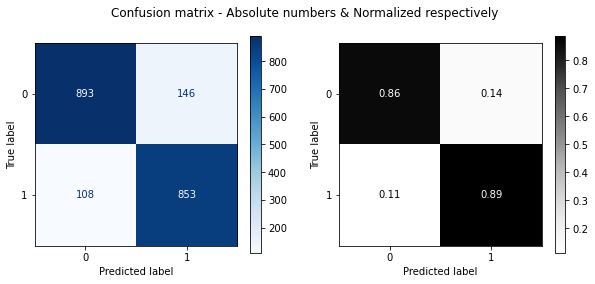

In [66]:
# Example code to get the confusion matrix using ConfusionMatrixDisplay
# Using previously used dataset and model
predictions = model3.predict(cv3.transform(X_test))
# We are reusing the logistic regression model with 300 dimensions embedding of features
cm_notnorm = confusion_matrix(y_test, predictions)
cm_norm = confusion_matrix(y_test, predictions, normalize="true")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Confusion matrix - Absolute numbers & Normalized respectively')
ConfusionMatrixDisplay(cm_notnorm).plot(cmap=plt.cm.Blues, ax=ax1)
ConfusionMatrixDisplay(cm_norm).plot(cmap=plt.cm.Greys, ax=ax2)
#ConfusionMatrixDisplay.from_predictions(y_test,predictions,normalize="true",cmap=plt.cm.Greys)

In [67]:
# Instead of the predictions as-is, one can obtain the probability for an individual sample to belong to a given class 
# By default, a threshold of 0.5 is used by the predict() function
model3.predict_proba(cv3.transform(X_test))

array([[0.74753222, 0.25246778],
       [0.97268901, 0.02731099],
       [0.01440663, 0.98559337],
       ...,
       [0.06684778, 0.93315222],
       [0.99675985, 0.00324015],
       [0.94421511, 0.05578489]])

In [68]:
# However, we can use the predict_proba() to customize the threshold
y_pred_03 = (model3.predict_proba(cv3.transform(X_test))[:,1] >= 0.3).astype(bool)
y_pred_07 = (model3.predict_proba(cv3.transform(X_test))[:,1] >= 0.7).astype(bool)

In [69]:
# Classification report for customized thresholds
from sklearn.metrics import classification_report
print("Threshop 0.3\n", classification_report(y_test,y_pred_03))
print("Threshop 0.5\n", classification_report(y_test,predictions))
print("Threshop 0.7\n", classification_report(y_test,y_pred_07))

Threshop 0.3
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      1039
           1       0.80      0.93      0.86       961

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000

Threshop 0.5
               precision    recall  f1-score   support

           0       0.89      0.86      0.88      1039
           1       0.85      0.89      0.87       961

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

Threshop 0.7
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1039
           1       0.89      0.83      0.86       961

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.8

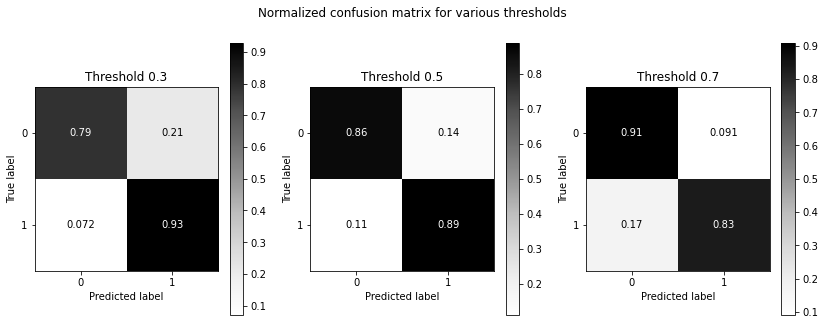

In [70]:
# Confusion matrices (normalized) for customized thresholds
cm_norm_03 = confusion_matrix(y_test, y_pred_03, normalize="true")
cm_norm_07 = confusion_matrix(y_test, y_pred_07, normalize="true")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))
fig.suptitle('Normalized confusion matrix for various thresholds')
ax1.title.set_text('Threshold 0.3')
ax2.title.set_text('Threshold 0.5')
ax3.title.set_text('Threshold 0.7')
ConfusionMatrixDisplay(cm_norm_03).plot(cmap=plt.cm.Greys, ax=ax1)
ConfusionMatrixDisplay(cm_norm).plot(cmap=plt.cm.Greys, ax=ax2)
ConfusionMatrixDisplay(cm_norm_07).plot(cmap=plt.cm.Greys, ax=ax3)

#### On prediction probabilities

- Probabilistic, e.g., Naïve Bayes 

- Non-probabilsitic, e.g., k-Nearest Neighbors (KNN), SVM
    - "probabilities" may be inferred, e.g., based on distance from decision boundaries


### Trade-off: Precision & Recall 

Relationship: Selected and relevant elements |  Precision and Recall
:-------------------------:|:-------------------------:
<img src="pics/precisionrecall1.png" alt="bigpic" width="300"/>  |  <img src="pics/precisionrecall2.png" alt="Sampling" width="300"/>
Image adapted from https://en.wikipedia.org/wiki/Precision_and_recall

- When trying to detect malignant tumors, will you prioritize precision or recall?

- When trying to detect fraudulent credit-card transactions in real-time, will you prioritize precision or recall?

- When making recommendations for jobs, what will give a person a better user experience?
    * Recall earlier discussions
        * <a href="http://radar.oreilly.com/2012/07/data-jujitsu.html">Data Jujitsu</a>

### Precision recall curve

In [71]:
# Precision recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
predictions_prob=[x[0] for x in model3.predict_proba(cv3.transform(X_test))]
precision, recall, _ = precision_recall_curve(y_test, predictions_prob)
print("precision:",precision[::100],"\n\n", "recall:",recall[::100])

precision: [0.4805     0.45368421 0.42444444 0.39235294 0.35875    0.32133333
 0.28357143 0.23769231 0.18583333 0.14454545 0.108      0.08333333
 0.05875    0.05142857 0.04166667 0.032      0.0275     0.01666667
 0.02       0.02       1.        ] 

 recall: [1.         0.89698231 0.7950052  0.69406868 0.59729448 0.50156087
 0.41311134 0.32154006 0.23204995 0.16545265 0.11238293 0.0780437
 0.04890739 0.03746098 0.02601457 0.01664932 0.01144641 0.00520291
 0.00416233 0.00208117 0.        ]


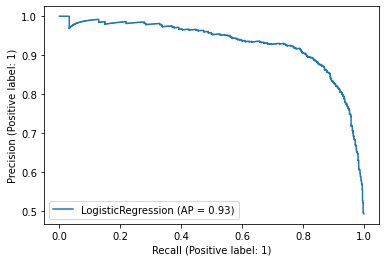

In [72]:
PrecisionRecallDisplay.from_estimator(model3,cv3.transform(X_test),y_test)
# What's the ideal point on/shape of the precision recall curve?

### $F$-score

- Harmonic mean of precision and recall: $F_1=2 \cdot \frac{precision \cdot recall}{precision + recall}$
- If recall is considered $\beta$ times as important as precision: $F_{\beta} = (1+\beta^2) \cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall}$

Recall: We used it in the Network Science module, to quantify the quality of clusters

In [73]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1039
           1       0.85      0.89      0.87       961

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



#### Macro and Micro-averages


* Macro: 
    * Metric is computed independently for each class. 
    * Each class is given equal weight when averaging. 
        * Classes with small population have disproportionate influence

* Micro: Each instance is given equal weight, and the metric is computed across all samples. 
    * In the event of class-imbalance, size of classes have proportional influence
     

In [74]:
# We are using a perfectly balanced data, so we don't expect to see much differences in this example
# But here's how to compute the macro/micro metrics, using an average attribute.
# Check manual for a few other choices, e.g. weighted
print(f1_score(y_test, predictions, average='macro'))
print(f1_score(y_test, predictions, average='micro'))

0.8729491796718687
0.8729999999999999


### Receiver operating characteristic (ROC) & Area Under Curve (AUC)
Etymology: Method's origins in operators of military radar receivers 

> The ROC curve plots the true positive rate (TPR), a.k.a., Recall or Sensitivity, along Y-axis, and the false positive rate (FPR) along X-axis, by varying decision thresholds. 
> - Determining the ROC in the multi-class case is non-trivial

> ROC aides discard suboptimal models
> ![ROC-zoomed.png](pics/ROCZoom.png)

> AUC statistic is used for model comparison

<center><img src="pics/Roc_curve.png" alt="ROC/AUC" width="500"/><br>
Image source: <a href="https://en.wikipedia.org/wiki/Receiver_operating_characteristic">Wikipedia article on ROC</a></center>

In [75]:
from sklearn.metrics import roc_curve, auc
# following code is adapted from 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
y_score = model3.decision_function(cv3.transform(X_test))
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

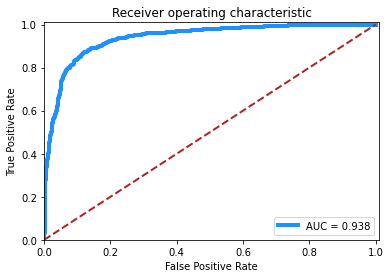

In [76]:
plt.figure()
plt.plot(fpr, tpr, color='dodgerblue',
         lw=4, label='AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], color='firebrick', lw=2, linestyle='--')
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [77]:
# measures supported in sklearn
from sklearn.metrics import SCORERS
print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']


### Multi-class data


- Some classifiers can natively support multiple classes
    - Check more details at https://scikit-learn.org/stable/modules/multiclass.html
- Some classifiers can only handle binary classes natively
    - They can be re-purposed for multi-class classification.
        * One versus Rest: N classifiers 
            * Caution: An implicit source of imbalance
        * One versus One: ${N \choose 2}$ classifiers

One versus Rest | One versus One
:-------------------------:|:-------------------------:
<img src="pics/oneversusrest.png" alt="OVR" width="300"/>  |  <img src="pics/oneversusone.png" alt="OVO" width="300"/>

In [78]:
# Scikit-learn allows to choose, e.g., SVC uses decision_function_shape{‘ovo’, ‘ovr’}, default=’ovr’
# An alternative is to explicitly use the multiclass library 
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn import datasets
iris_X, iris_y = datasets.load_iris(return_X_y=True)
iris_X = StandardScaler().fit_transform(iris_X)
# Caution: I have not used train/test splits in this example
OvR=OneVsRestClassifier(LinearSVC(random_state=0)).fit(iris_X, iris_y).predict(iris_X)
OvO=OneVsOneClassifier(LinearSVC(random_state=0)).fit(iris_X, iris_y).predict(iris_X)
unique, counts = np.unique(OvR==OvO, return_counts=True)
dict(zip(unique, counts))

{False: 5, True: 145}

### Grid search
Exploring the parameter space to identify good/optimal parameters
- Parameter choices depend on the algorithm being used 
- See <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">Scikit-learn examples</a> for more details and sophisticated use cases. 

In [79]:
# A very basic example of Grid search 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
iris_X, iris_y = datasets.load_iris(return_X_y=True)
parameters = {'kernel':('linear', 'rbf'), 'C':range(1,11,2)}
# Remember: Parameter choices depend on the algorithm being used
svc = SVC()
clf = GridSearchCV(estimator=svc, param_grid=parameters)
clf.fit(iris_X, iris_y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 11, 2), 'kernel': ('linear', 'rbf')})

In [80]:
results=clf.cv_results_
# What all is available in the results?
print(list(results.keys()))

['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score']


In [81]:
results['mean_test_score']

array([0.98      , 0.96666667, 0.97333333, 0.98      , 0.98      ,
       0.98666667, 0.97333333, 0.98666667, 0.97333333, 0.98      ])

In [82]:
results['rank_test_score']

array([ 3, 10,  7,  3,  3,  1,  7,  1,  7,  3])

#### Model tuning and evaluation wrap-up

- Our discussion was anchored around <span style="color:IndianRed">supervised learning</span>, and for <span style="color:SteelBlue">Classification</span> task in particular
    * Metrics for <span style="color:SteelBlue">Regression</span> are simpler, e.g., r2 score, mean absolute error, etc
    * For <span style="color:IndianRed">unsupervised learning</span>, e.g., <span style="color:SteelBlue">Clustering</span>, some of the measures we saw here, e.g., F-score can be repurposed, if (a big IF!) the "ground truth" is known. 
- While many measures exist and several/all of them can be used to understand the general behaviour of the models, final evaluation and optimization may need to be <span style="color:SteelBlue">use-case driven</span>.


## Transformations
- Revisting <span style="color:IndianRed">representation</span> phase of the ML-lifecycle
    - We have already discussed some basics: Data cleaning, removal of samples with missing values, syntactic conversion of information so that the algorithms can "consume" the data (e.g., CountVectorizer)  
    - <span style="color:IndianRed">Standardization:</span> Normalization, scaling, etc.
        * See <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing">sklearn.preprocessing</a>
            * <span style="color:SteelBlue">StandardScaler:</span> Standardize features by removing the mean and scaling to unit variance.
            * <span style="color:SteelBlue">MinMaxScaler:</span> Transform features by scaling each feature to a given range.

## Transformations
- Revisting <span style="color:IndianRed">representation</span>
    - <span style="color:IndianRed">Data embedding/dimensionality reduction:</span> Principal Component Analysis (PCA), Linear discriminant analysis (LDA), <a href="https://scikit-learn.org/stable/modules/manifold.html">manifold</a>, etc.
    
Recommended reading: Blog <a href="http://techflare.blog/3-ways-to-do-dimensionality-reduction-techniques-in-scikit-learn/">showcasing multiple dimensionality reduction techniques</a>.    

### Philosophical tangent: PCA vs LDA 
PCA |  LDA
:-------------------------:|:-------------------------:
<img src="pics/pca.png" alt="bigpic" width="263"/>  |  <img src="pics/lda.png" alt="Sampling" width="300"/>
Image source <a href="https://sebastianraschka.com/faq/docs/lda-vs-pca.html">https://sebastianraschka.com/</a>. See also <a href="https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html">scikit-learn PCA & LDA</a> usage example.

In [83]:
# The following example of using PCA, Standardization and make_pipeline is adapted from 
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py
# It has been made available under License: BSD 3 clause by
# Tyler Lanigan <tylerlanigan@gmail.com> and Sebastian Raschka <mail@sebastianraschka.com>

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
RANDOM_STATE = 42
FIG_SIZE = (10, 4)

In [84]:
features, target = load_wine(return_X_y=True)
# 2:1 Train-Test split
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(features, target,
                                                    test_size=0.33,
                                                    random_state=RANDOM_STATE) 
# Fit the raw data and predict using GNB following PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train_wine, y_train_wine)
pred_test2 = unscaled_clf.predict(X_test_wine)
# Using PCA with 3 components
unscaled_clf = make_pipeline(PCA(n_components=3), GaussianNB())
unscaled_clf.fit(X_train_wine, y_train_wine)
pred_test3 = unscaled_clf.predict(X_test_wine)

In [85]:
print("PCA (2 components) + GNB \n", metrics.classification_report(y_test_wine, pred_test2))
print("PCA (3 components) + GNB \n", metrics.classification_report(y_test_wine, pred_test3))

PCA (2 components) + GNB 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.78      0.75      0.77        24
           2       0.60      0.60      0.60        15

    accuracy                           0.80        59
   macro avg       0.78      0.78      0.78        59
weighted avg       0.79      0.80      0.79        59

PCA (3 components) + GNB 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.88      0.92      0.90        24
           2       0.86      0.80      0.83        15

    accuracy                           0.92        59
   macro avg       0.91      0.91      0.91        59
weighted avg       0.91      0.92      0.91        59



In [86]:
# Fit to data and predict using a pipeline of scaling/standardization, PCA and GNB.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
# try using MinMaxScaler and see what you get!
std_clf.fit(X_train_wine, y_train_wine)
pred_test_std = std_clf.predict(X_test_wine)
print("Standardization + PCA (2 components) + GNB \n", metrics.classification_report(y_test_wine, pred_test_std))

Standardization + PCA (2 components) + GNB 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.96      1.00      0.98        24
           2       1.00      1.00      1.00        15

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



In [87]:
# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Show first principal components
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])

# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train_wine)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train_wine))


PC 1 without scaling:
 [ 1.77738063e-03 -8.13532033e-04  1.41672133e-04 -5.43218358e-03
  1.96719103e-02  1.04099788e-03  1.54504422e-03 -1.15638097e-04
  6.52261761e-04  2.26846944e-03  1.61421529e-04  7.81011292e-04
  9.99784964e-01]

PC 1 with scaling:
 [ 0.14733424 -0.25027499 -0.01252058 -0.23440896  0.15738948  0.39369045
  0.41565632 -0.27414911  0.33265958 -0.10517746  0.29234204  0.38195327
  0.28245765]


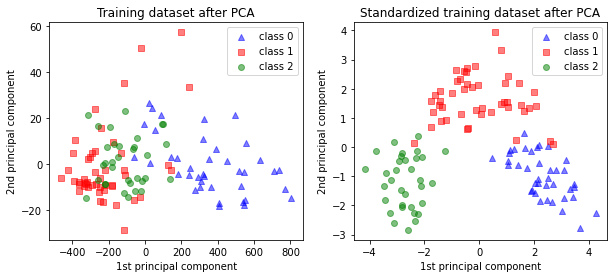

In [88]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)
for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train_transformed[y_train_wine == l, 0],
                X_train_transformed[y_train_wine == l, 1],
                color=c, label='class %s' % l, alpha=0.5, marker=m)
for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std_transformed[y_train_wine == l, 0],
                X_train_std_transformed[y_train_wine == l, 1],
                color=c, label='class %s' % l, alpha=0.5, marker=m)           
ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')
for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')

#### Ungraded task 6.3

Consider the Iris dataset from sklearn. 
Build and evaluate classifiers by following the various principles discussed in this module, e.g., taking into account class imbalance (if any), difference in scales of features, number of dimensions, choice of classifier algorithms and parameters there-in. 

Share your code along with a summary of the classification report (and any other measures and tools, e.g. plotting the results from grid search) achieved by the "best" model you can train.  

> To get started: <span style="color:SteelBlue">from sklearn.datasets import load_iris</span>  

<center><span style="font-size: 250%">
    <span style="color:firebrick">That's it folks!</span><br></span>
<img alt="Do electronic sheeps understand jokes?" src="pics/electronicsheep2.png" width="700">
</center>
